In [1]:
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import random

In [2]:
df2 = pd.read_csv('imdb_master.csv',encoding="ISO-8859-1")
df2 = df2[~(df2['label'] == 'unsup')]
df2['label'] = [0 if x == 'neg' else 1 for x in df2['label']]

In [3]:
sc = StandardScaler()
df = pd.read_csv('X_df.csv')
df = sc.fit_transform(df)

'''
lda = LDA(n_components=1)
df = lda.fit_transform(df, df2['label'])
'''

pca = PCA(n_components = 10)
df = pca.fit_transform(df)


In [4]:
df

array([[-0.64743352, -2.15265171, -0.61907739, ...,  2.66955897,
        -0.34413693,  0.52596529],
       [ 0.7005066 ,  1.60124537,  2.18682769, ...,  0.53549971,
        -0.61056232,  0.98722644],
       [ 0.93587476, -2.78502809,  1.19577612, ...,  0.7269375 ,
        -0.45995573,  0.58397172],
       ...,
       [ 1.9622499 ,  0.03216185, -1.15059262, ..., -0.13709934,
         0.04682177,  0.70390844],
       [-0.174117  ,  1.51639625, -1.82145187, ..., -0.37879577,
         1.70894821, -0.57401211],
       [-2.51344829, -0.28732763,  1.18924708, ...,  2.74520865,
        -0.50536735,  0.4067832 ]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df), df2['label'], test_size = 0.3) 

# Model Building

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

#colors = ['navy', 'turquoise', 'darkorange']
colors = ['navy', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = len(np.unique(y_train))


lda = LDA(n_components=1)
df = lda.fit_transform(df, df2['label'])



In [7]:
np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])

array([[ 0.61221511, -0.46717749,  0.62470259, -0.00441697, -0.10738172,
         0.02062819, -0.27871011, -0.00114363, -0.0903612 ,  0.09235875],
       [-0.6196466 ,  0.44969167, -0.62971458,  0.00859616,  0.10876301,
        -0.02739137,  0.29432187,  0.01535555,  0.09265519, -0.08205716]])

In [8]:
# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter = 20))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])


n_estimators = len(estimators)

plt.figure(figsize=(30 * n_estimators // 2, 60))

'''
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
'''

'\nplt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,\n                    left=.01, right=.99)\n'

<Figure size 4320x4320 with 0 Axes>

spherical
train_accuracy is:50.33428571428571
test_accuracy is: 49.51333333333333
diag
train_accuracy is:53.16857142857143
test_accuracy is: 53.82666666666667
tied
train_accuracy is:74.80857142857143
test_accuracy is: 74.24
full


No handles with labels found to put in legend.


train_accuracy is:48.34285714285714
test_accuracy is: 49.18666666666667


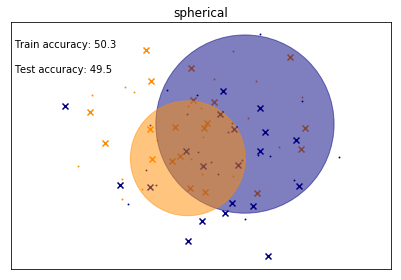

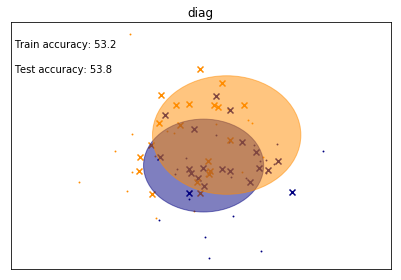

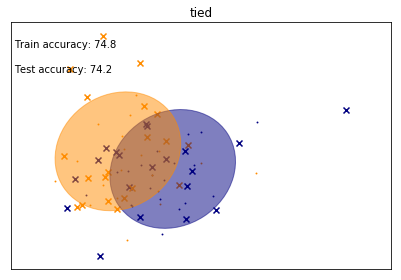

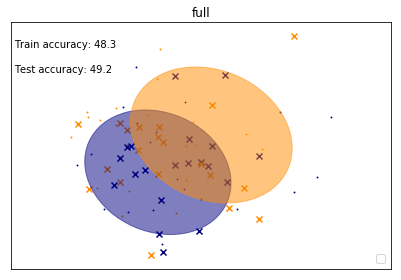

In [9]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    print(name)
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    plt.figure(figsize=(15, 10))
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    
    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        data = data[random.sample(range(len(data)), 20)]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color)
        
    # Plot the test data with crosses
    
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        data = data[random.sample(range(len(data)), 20)]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
    
    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    print('train_accuracy is:%s'%train_accuracy)
    plt.text(0.01, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    print('test_accuracy is: %s'%test_accuracy)
    plt.text(0.01, 0.8, 'Test accuracy: %.1f' % test_accuracy,
            transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    
plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()